# Luento 5: Osa 1 (11.2.): Hajontakuvio ja korrelaatio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tuodaan aineisto

In [3]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.shape

(398, 9)

Tutustutaan menetelmiin, joilla voi tarkastella kahden määrällisen muuttujan yhteyttä.

## Hajontakuvio

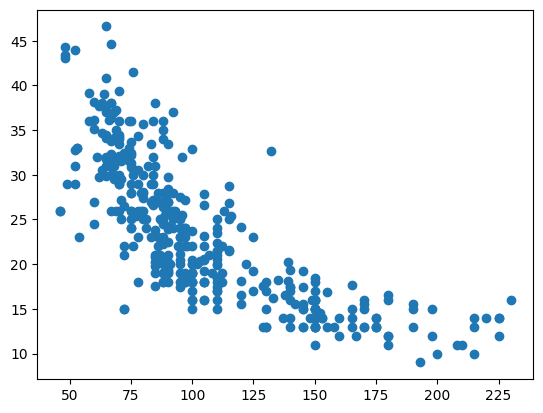

In [5]:
# hajontakuvio: kulutus (mpg) ja tehi (horsepower)
# matplotlib
plt.scatter(df["horsepower"], df["mpg"])

<Axes: xlabel='horsepower', ylabel='mpg'>

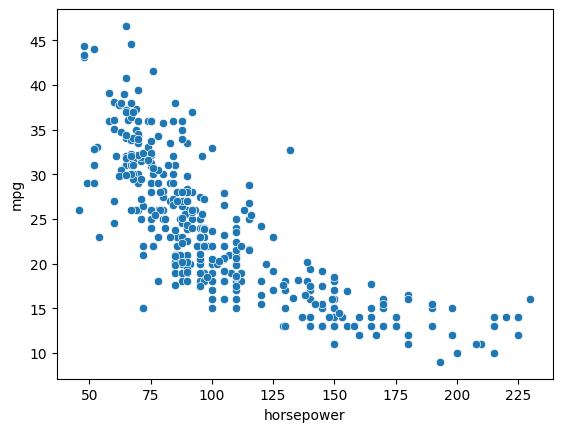

In [6]:
# sama seaborn-kirjaston avulla
sns.scatterplot(data=df, x="horsepower", y="mpg")

Huomataan, tehokkaat autot kuluttavat keskimäärin enemmän polttoainetta kuin vähemmän tehokkaat autot.

Text(0, 0.5, 'Kulutus (mpg)')

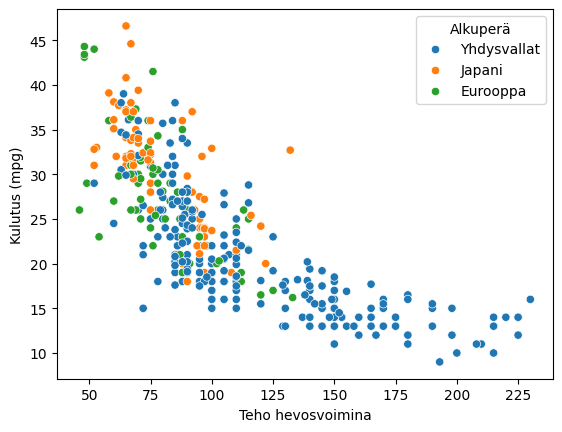

In [11]:
# muokataan edellistä hajontakuviota

# suomennetaan alueiden nimet
df_suom = df.copy()
df_suom["origin"] = df_suom["origin"].replace({"usa": "Yhdysvallat", "japan": "Japani", "europe": "Eurooppa"})

sns.scatterplot(data=df_suom, x="horsepower", y="mpg", hue="origin")

# otsikot suomeksi
plt.legend(title="Alkuperä")
plt.xlabel("Teho hevosvoimina")
plt.ylabel("Kulutus (mpg)")

<Axes: xlabel='horsepower', ylabel='acceleration'>

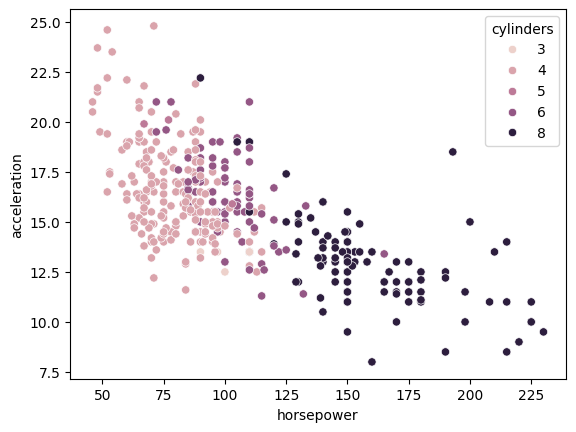

In [14]:
# vielä yksi esimerkki
sns.scatterplot(data=df, x="horsepower", y="acceleration", hue="cylinders")

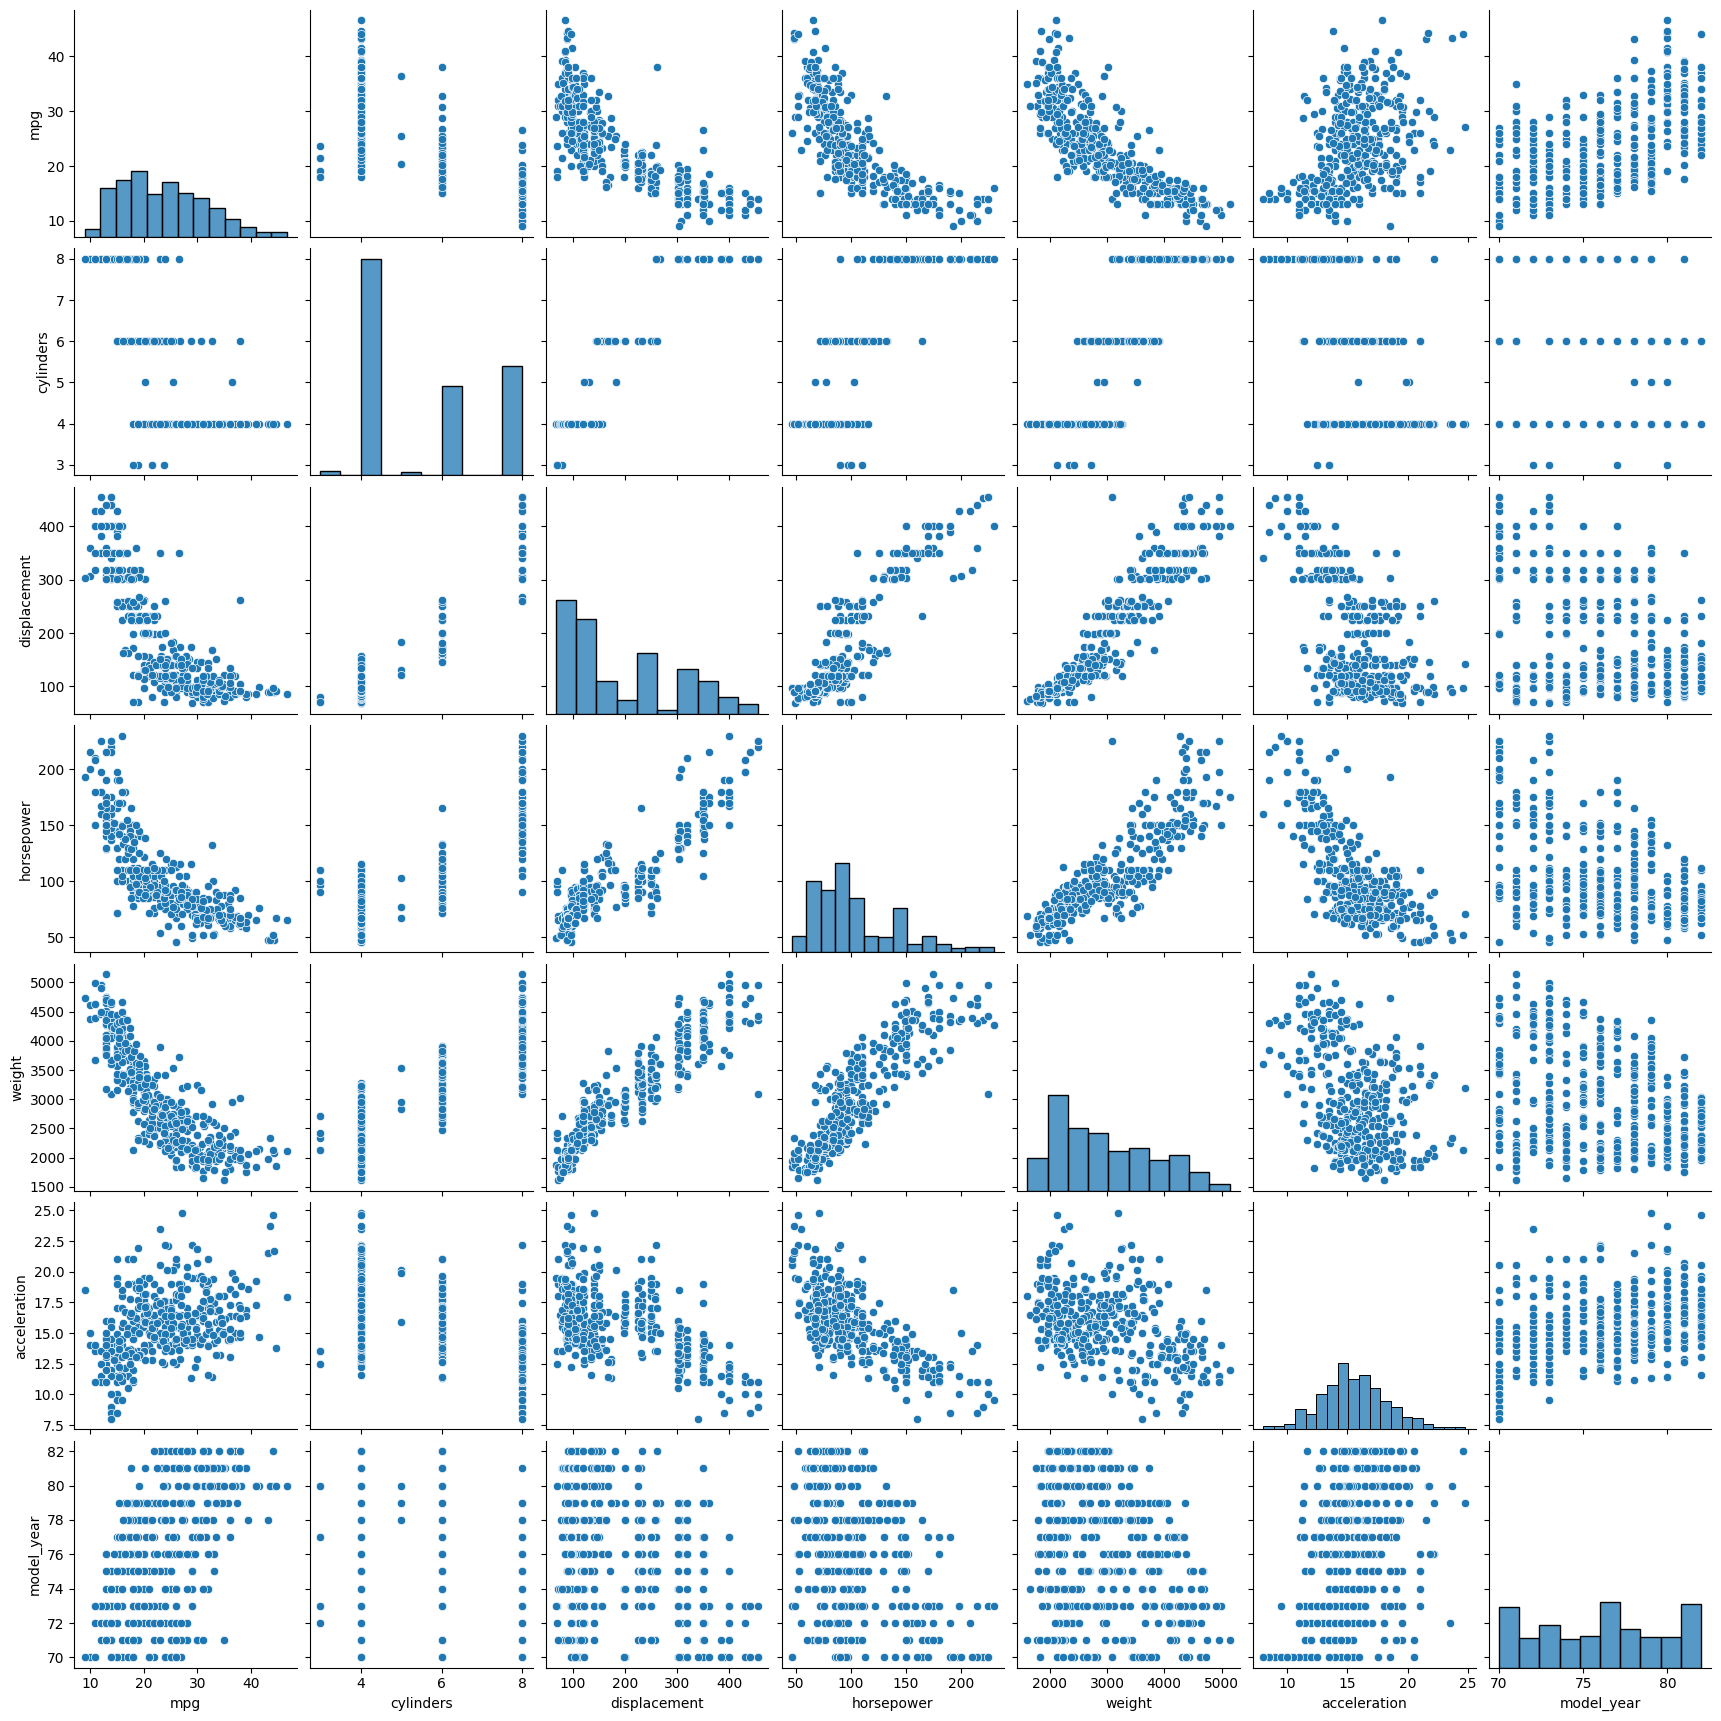

In [15]:
# kaikki hajontakuviot
sns.pairplot(data=df)

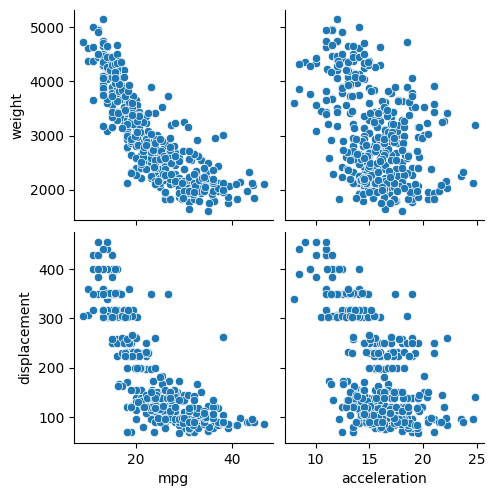

In [16]:
# hajontakuviomatriisissa voi myös rajoittaa, mitä muuttujia siihen tulee
sns.pairplot(data=df, x_vars=["mpg", "acceleration"], y_vars=["weight", "displacement"])

In [17]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None
)
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.

    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.

    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a

# Korrelaatio

Korreaatiokerroin on hajontakuvion numeerinen vastine. Sillä voidaan tarkastella kahden määrällisen muuttujan yhteyttä.

In [18]:
# lasketaan kulutuksene ja tehon välinen korrelaatiokerroin
df["mpg"].corr(df["horsepower"])

np.float64(-0.7784267838977759)

In [19]:
# muodostetaan korrelaatiomatriisi
df.drop(columns=["origin", "name"]).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [20]:
# poimitaan vain osa korrelaatioista
df.drop(columns=["origin", "name"]).corr().loc[["weight", "displacement"], ["mpg", "acceleration"]]

,mpg,acceleration
weight,-0.831741,-0.417457
displacement,-0.804203,-0.543684


In [22]:
# siistitään korrelaatiomatriisia
df.drop(columns=["origin", "name"]).corr().style.format(precision=2).background_gradient(cmap="PiYG")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00
